In [1]:
import tensorflow as tf
import tensorflow_hub as tfhub
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

In [3]:
# for layer in eff_models.layers : 
#     layer.trainable = False

In [4]:
guava_data = './Data/Guava/'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


image_size = (224,224)
batch_size = 8


train_datagen = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split = 0.2
)

train_generator = train_datagen.flow_from_directory(
    guava_data,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    guava_data,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation'
)

test_generator = train_datagen.flow_from_directory(
    guava_data,
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False,
    subset = 'validation'
)

Found 1842 images belonging to 5 classes.
Found 457 images belonging to 5 classes.
Found 457 images belonging to 5 classes.


In [6]:
input_shape = (224, 224, 3)
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(
          filters=64,
          kernel_size=3,
          activation='relu',
          input_shape=input_shape
        ),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPool2D(
          pool_size=2,
          padding='valid'
        ),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(256, activation = 'relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(5, activation='softmax')
    ]
)
model.build(input_shape=input_shape)

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 global_average_pooling2d (G  (None, 64)               0

In [9]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data = validation_generator,
    validation_steps = len(validation_generator)
)

Epoch 1/20
231/231 [==============================] - 594s 3s/step - loss: 1.0535 - accuracy: 0.6097 - val_loss: 0.8525 - val_accuracy: 0.6433
Epoch 2/20
231/231 [==============================] - 598s 3s/step - loss: 0.8261 - accuracy: 0.6862 - val_loss: 0.7725 - val_accuracy: 0.7265
Epoch 3/20
231/231 [==============================] - 606s 3s/step - loss: 0.7492 - accuracy: 0.7166 - val_loss: 0.6556 - val_accuracy: 0.7527
Epoch 4/20
231/231 [==============================] - 536s 2s/step - loss: 0.7026 - accuracy: 0.7242 - val_loss: 0.6688 - val_accuracy: 0.7637
Epoch 5/20
231/231 [==============================] - 525s 2s/step - loss: 0.6504 - accuracy: 0.7345 - val_loss: 0.6545 - val_accuracy: 0.7505
Epoch 6/20
231/231 [==============================] - 537s 2s/step - loss: 0.6292 - accuracy: 0.7416 - val_loss: 0.5554 - val_accuracy: 0.7593
Epoch 7/20
231/231 [==============================] - 533s 2s/step - loss: 0.5833 - accuracy: 0.7606 - val_loss: 0.5679 - val_accuracy: 0.7593

In [10]:
model.evaluate(test_generator)

58/58 [==============================] - 108s 2s/step - loss: 0.5013 - accuracy: 0.8009


[0.5012736320495605, 0.8008752465248108]

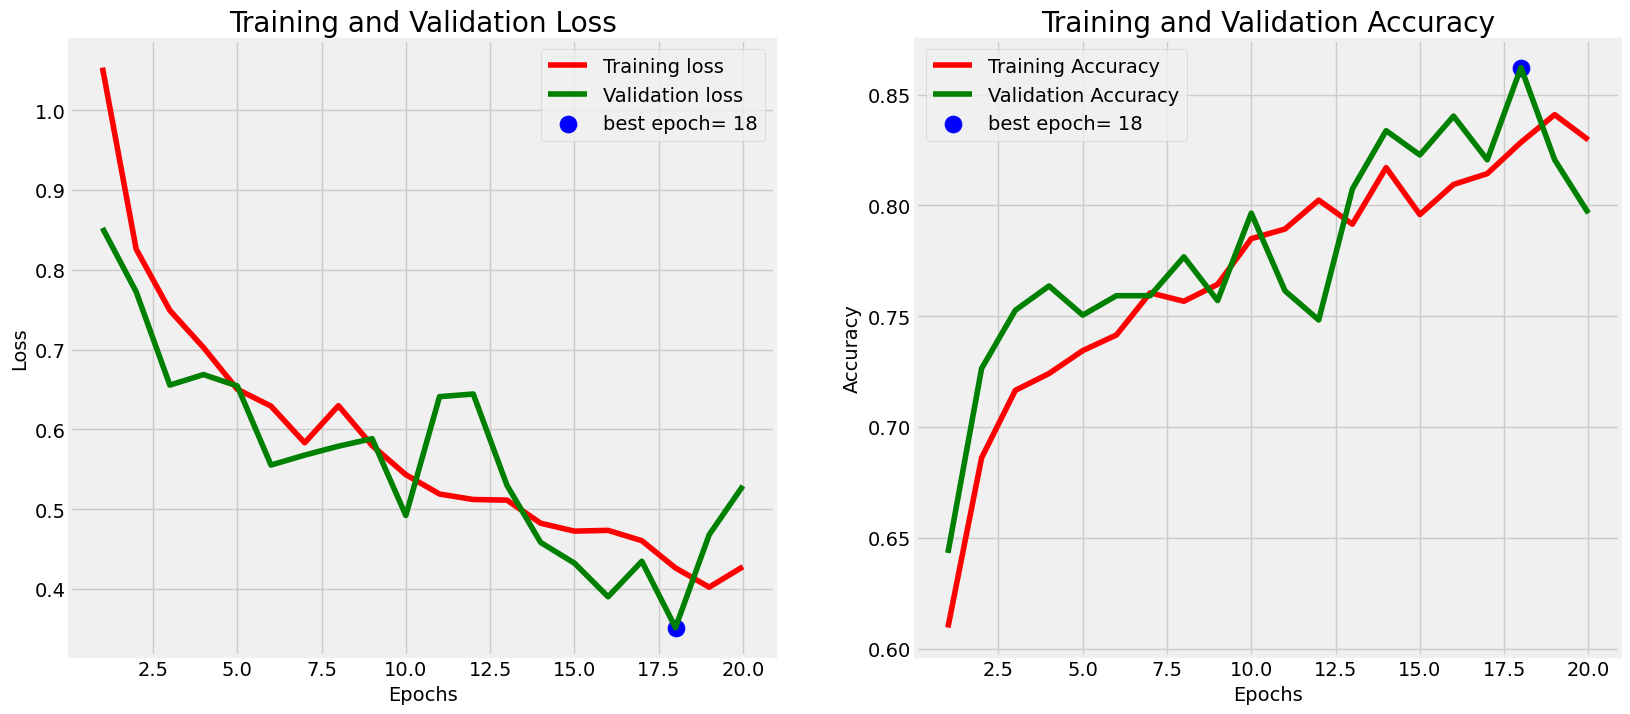

In [11]:
import numpy as np

tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [12]:
model.save('guavas_model2.h5')